# Luca Corsetti 0001131095

Find clusters for the included dataset.
The solution must be produced as a Python Notebook.
The notebook must include appropriate comments and must operate as
follows:
1. load the data into a dataframe df, show its size and head, eliminate
the rows containing null values and show the number of remaining
rows (2pt)
2. produce a pairplot of the numeric columns of df and comment
relevant situations (2pt)
3. Produce a box plot of the numeric columns of df and comment
relevant situations (2pt)
4. Produce the correlation matrix of the data and eliminate the
redundant attributes, if it is adequate (4pt)
    - For example, if attributes a and b have high correlation (e.g.
    absolute value higher than 0.95) one of the two can be
    eliminated
    - Refer to this
    https://stackoverflow.com/questions/29432629/plotcorrelation-matrix-using-pandas for the generation of the
    correlation matrix
5. Split the reduced data: store the first column in a vector keys and the
others in a matrix X (2pt)
6. Find the best clustering scheme for the data (possibly reduced after
step 4) with a method of your choice, plot global silhouette index for
an appropriate range of hyperparameter(s) and show the chosen
hyperparameter(s) (4pt)
7. Fit the clustering scheme to y, then produce the silhouette plot using
the function plot_silhouette contained in the attached file (4pt)
8. Perform a logarithmic transformation of the data (4pt)
    - This means simply to apply the log function of numpy
    - If one of the columns has zero or negative values, avoid its transformation
9. repeat points 6 and 7 above and comment the comparison with the
result of point 6 (2pt)

Quality of the code (6pt):
• Include appropriate comments with reference to the numbered
requirements
• Useless cells, pieces of code and non-required output will be
penalized
o Remove the code you use for testing and inspecting the
variables during the development
• Naming style of variables must be uniform and in English
• Bad indentation and messy code will be penalized

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plot_silhouette import plot_silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline

random_state=777

### 1. load the data into a dataframe df, show its size and head, eliminate the rows containing null values and show the number of remaining rows (2pt)

In [2]:
df = pd.read_csv('./country_stats.csv', )

df.head()

,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
3,American Samoa,5.760000e+08,5.760000e+08,10352.822762,10352.822762,NaN,-1.054862,55637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0


let's eliminate the rows with NaN values

In [3]:
cleared_df = df.dropna()

cleared_df.head()

,Country Name,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,Afghanistan,1.593680e+10,1.593680e+10,553.300289,553.300289,4.0,2.812617,28803167.0
1,Albania,1.192695e+10,1.192695e+10,4094.358832,4094.358832,45.0,-0.496462,2913021.0
2,Algeria,1.612073e+11,1.612073e+11,4463.394675,4463.394675,12.5,1.821358,36117637.0
4,Andorra,3.355695e+09,3.355695e+09,39736.354063,39736.354063,81.0,-0.015393,84449.0
5,Angola,8.247091e+10,8.247091e+10,3529.053482,3529.053482,2.8,3.570099,23369131.0


In [4]:
print(f"removed {df.shape[0]-cleared_df.shape[0]} rows with NaN values")
print(f"cleared size {cleared_df.shape[0]}")

removed 21 rows with NaN values
cleared size 221


### 2. produce a pairplot of the numeric columns of df and comment relevant situations (2pt)

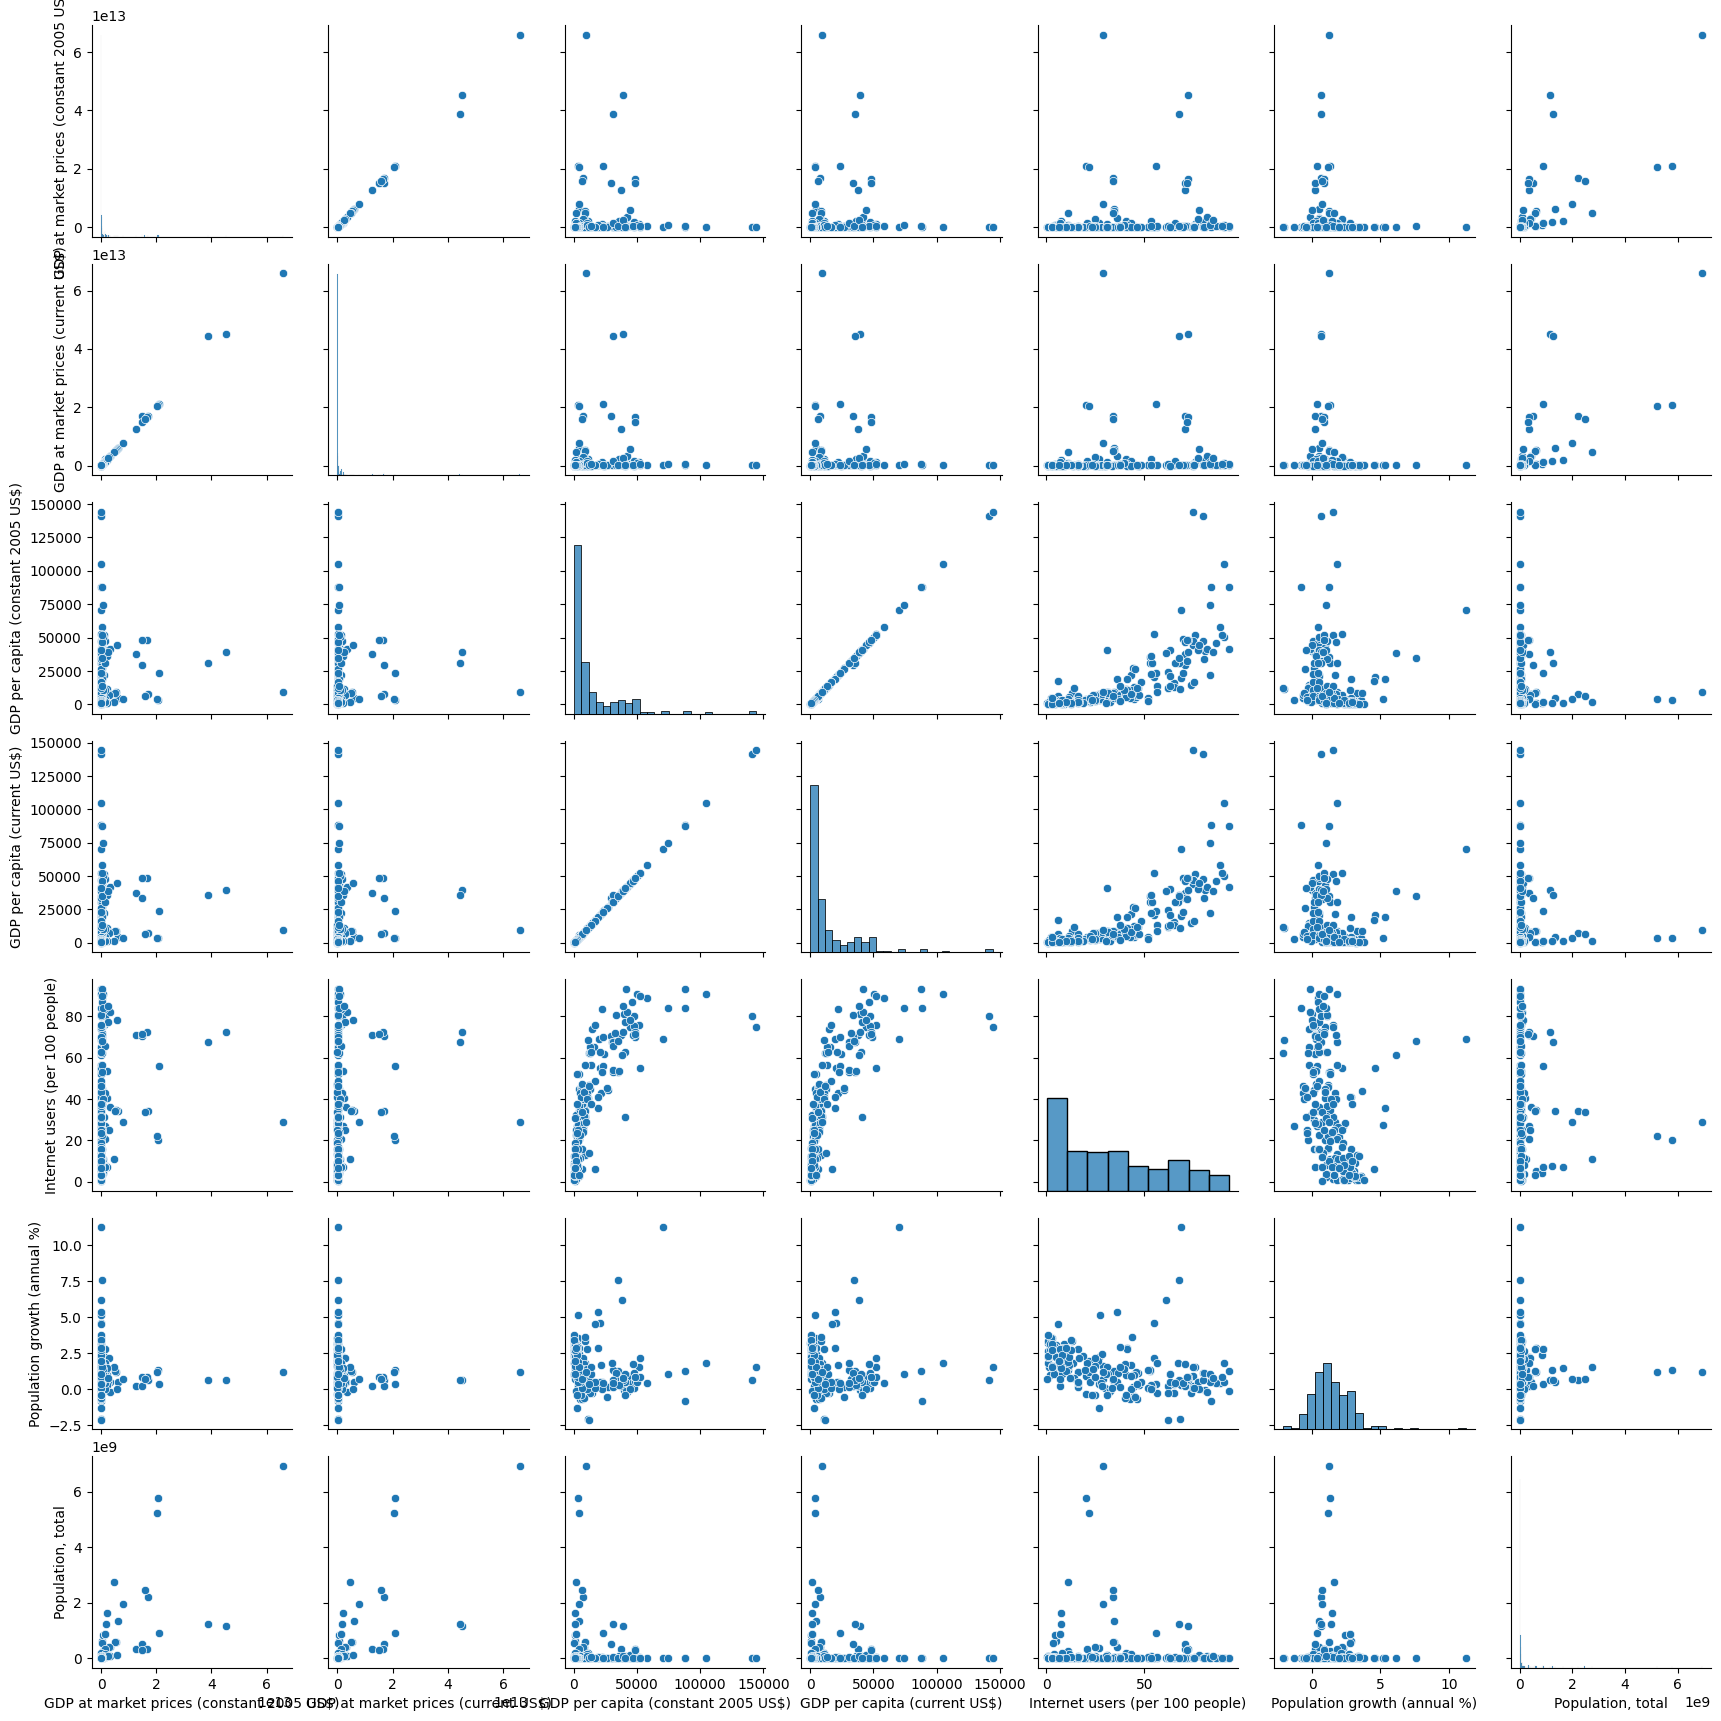

In [5]:
X = cleared_df.drop(columns=['Country Name'])

sns.pairplot(X)

There does not seem to be any particularity in the pairplot to hightlight.

### 3. Produce a box plot of the numeric columns of df and comment relevant situations (2pt)

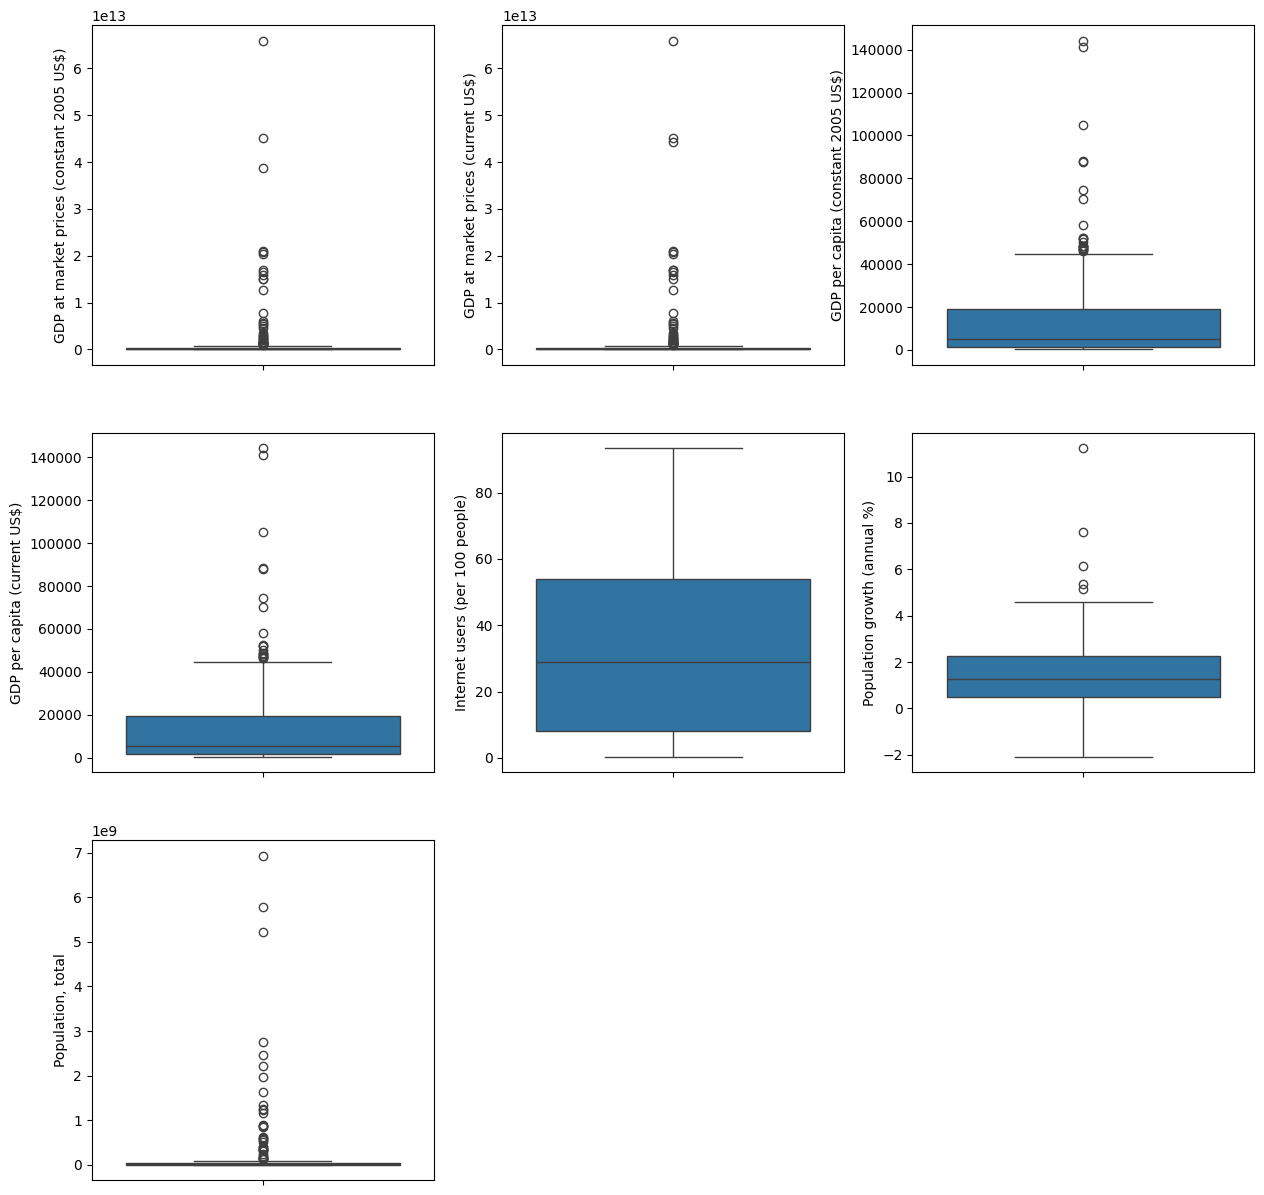

In [6]:
plt.figure(figsize=(15,15))

pos = 1
for i in X.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(X[i])
    pos += 1

Notable things:
- Plots like "Population, total", "GDP at market prices (constant 2005 US$)", "GDP at market prices (current US$)" seem to be concentrated in a small range, with quite a few outliers
- Plots like "GDP per capita (constant 2005 US$)", "GDP per capita (current US$)" and "Population Growth (annual %)" seem to be less concentrated with fewer outliers
- "Internet users (per 100 people)" does not have outliers and its median is almost in the middle of the data range

### 4. Produce the correlation matrix of the data and eliminate the redundant attributes, if it is adequate (4pt)

- For example, if attributes a and b have high correlation (e.g.
    absolute value higher than 0.95) one of the two can be
    eliminated
- Refer to this
    https://stackoverflow.com/questions/29432629/plotcorrelation-matrix-using-pandas for the generation of the
    correlation matrix

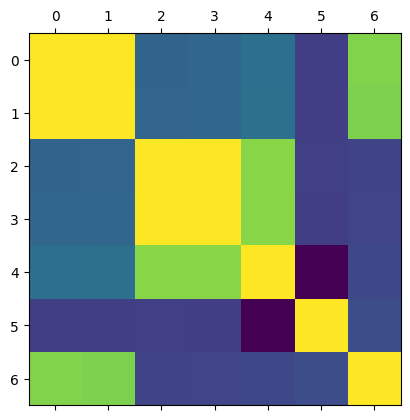

In [7]:
corr_matrix = X.corr()

plt.matshow(corr_matrix)
plt.show()

In [8]:
corr_matrix

,GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
GDP at market prices (constant 2005 US$),1.000000,0.998671,0.082985,0.089343,0.140434,-0.103056,0.743659
GDP at market prices (current US$),0.998671,1.000000,0.084445,0.091601,0.143265,-0.103523,0.731674
GDP per capita (constant 2005 US$),0.082985,0.084445,1.000000,0.999829,0.757132,-0.101623,-0.076738
GDP per capita (current US$),0.089343,0.091601,0.999829,1.000000,0.758325,-0.102485,-0.075101
Internet users (per 100 people),0.140434,0.143265,0.757132,0.758325,1.000000,-0.356460,-0.062403
Population growth (annual %),-0.103056,-0.103523,-0.101623,-0.102485,-0.356460,1.000000,-0.037483
"Population, total",0.743659,0.731674,-0.076738,-0.075101,-0.062403,-0.037483,1.000000


Without much of a surprise, we can notice that both _constant 2005 US\$_ and _current US\$_ attributes are highly correlated with each other, we can therefore drop current US\$ and keep _constant 2005 US\$_.

In [9]:
columns_to_drop = ['GDP at market prices (current US$)', 'GDP per capita (current US$)']

X = X.drop(columns_to_drop, axis=1)

X.head()

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,1.593680e+10,553.300289,4.0,2.812617,28803167.0
1,1.192695e+10,4094.358832,45.0,-0.496462,2913021.0
2,1.612073e+11,4463.394675,12.5,1.821358,36117637.0
4,3.355695e+09,39736.354063,81.0,-0.015393,84449.0
5,8.247091e+10,3529.053482,2.8,3.570099,23369131.0


### 5. Split the reduced data: store the first column in a vector keys and the others in a matrix X (2pt)

we already have X, so we will just save the first column in the variable **y**

In [10]:
y = df['Country Name']

y

0             Afghanistan
1                 Albania
2                 Algeria
3          American Samoa
4                 Andorra
              ...        
237    West Bank and Gaza
238                 World
239           Yemen, Rep.
240                Zambia
241              Zimbabwe
Name: Country Name, Length: 242, dtype: object

### 6. Find the best clustering scheme for the data (possibly reduced after step 4) with a method of your choice, plot global silhouette index for an appropriate range of hyperparameter(s) and show the chosen hyperparameter(s) (4pt)

In [11]:
clusters_range = range(2, 11)

inertia = []
silhouette_scores = []

for k in clusters_range:
    km = KMeans(n_clusters=k, random_state=random_state)
    y_km = km.fit_predict(X)

    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, y_km))

    print(f"k={k}, inertia={inertia[-1]}, silhouette_score={silhouette_scores[-1]}")

k=2, inertia=3.131337732979647e+27, silhouette_score=0.9328994201641293
k=3, inertia=7.249924193687885e+26, silhouette_score=0.9377601044176742
k=4, inertia=3.43156658077705e+26, silhouette_score=0.9384080065840313
k=5, inertia=1.5406249268791991e+26, silhouette_score=0.877695986523347
k=6, inertia=9.58174493996917e+25, silhouette_score=0.8790494731528833
k=7, inertia=5.2849418707891685e+25, silhouette_score=0.8578171587094616
k=8, inertia=3.256660579157281e+25, silhouette_score=0.8517463690578371
k=9, inertia=2.7858096274261575e+25, silhouette_score=0.8416669116674695
k=10, inertia=1.963604794119433e+25, silhouette_score=0.822466898384798


plot the silhouette to determine which k count is the most optimal

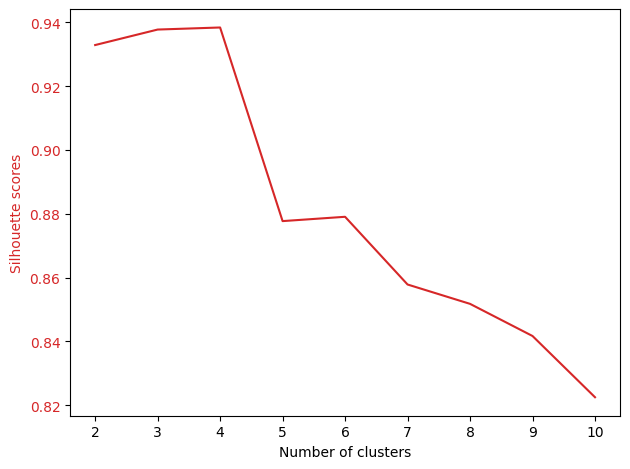

In [12]:
fig, ax = plt.subplots()

color = 'tab:red'

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(clusters_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

The silhouette score is at its maximum at k=2

In [13]:
best_k = np.argmax(silhouette_scores) + 2 # range (clusters) starts at 2

best_k

np.int64(4)

### 7. Fit the clustering scheme to y, then produce the silhouette plot using the function plot_silhouette contained in the attached file (4pt)

In [14]:
km = KMeans(n_clusters=best_k, random_state=random_state)

y_km = km.fit_predict(X)

km.fit(X)

KMeans(n_clusters=np.int64(4), random_state=777)

let's plot the silhouette for y using the provided plot_silhouette fn

In [15]:
help(plot_silhouette)

Help on function plot_silhouette in module plot_silhouette:

plot_silhouette(
    silhouette_vals,
    y,
    colors=<matplotlib.colors.ListedColormap object at 0x114db1490>,
    plot_noise=False
)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.

    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples
    plot_noise:      boolean, assumes the noise to be labeled with a negative integer



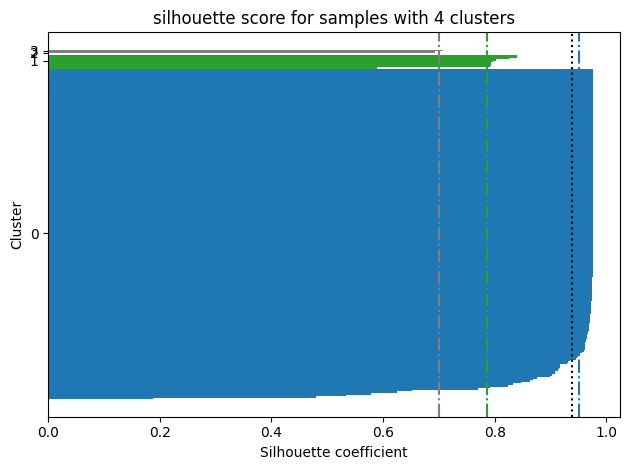

In [16]:
samples = silhouette_samples(X, y_km)

plt.title(f"silhouette score for samples with {best_k} clusters")
plot_silhouette(samples, y_km)

### 8. Perform a logarithmic transformation of the data (4pt)

- This means simply to apply the log function of numpy
- If one of the columns has zero or negative values, avoid its transformation

In [17]:
for c in X.columns:
    if len(X[c]) != sum(np.greater(X[c], 0)):
        continue
    
    X[c] = np.log(X[c])

X

,GDP at market prices (constant 2005 US$),GDP per capita (constant 2005 US$),Internet users (per 100 people),Population growth (annual %),"Population, total"
0,23.491897,6.315901,1.386294,2.812617,17.175996
1,23.202067,8.317365,3.806662,-0.496462,14.884701
2,25.805957,8.403665,2.525729,1.821358,17.402292
4,21.933925,10.590022,4.394449,-0.015393,11.343903
5,25.135711,8.168785,1.029619,3.570099,16.966927
...,...,...,...,...,...
237,22.910788,7.757359,3.621671,2.898629,15.153429
238,31.819987,9.160766,3.362250,1.218629,22.659220
239,24.154240,7.177196,2.513656,2.713034,16.977044
240,23.732189,7.288390,2.302585,2.883152,16.443798


### 9. repeat points 6 and 7 above and comment the comparison with the result of point 6 (2pt)

In [18]:
new_X = X.drop('GDP at market prices (constant 2005 US$)', axis = 1)
new_y = X['GDP at market prices (constant 2005 US$)']

In [19]:
inertia = []
silhouette_scores = []

for k in clusters_range:
    km = KMeans(n_clusters=k, random_state=random_state)
    new_y_km = km.fit_predict(new_X)

    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(new_X, new_y_km))

    print(f"k={k}, inertia={inertia[-1]}, silhouette_score={silhouette_scores[-1]}")

k=2, inertia=1894.424412976562, silhouette_score=0.30657822287851627
k=3, inertia=1362.6759212177253, silhouette_score=0.33235046314038796
k=4, inertia=1164.6375275025198, silhouette_score=0.3480413045606788
k=5, inertia=847.1387072763528, silhouette_score=0.3749164647017556
k=6, inertia=749.6702009764085, silhouette_score=0.33432089016342387
k=7, inertia=682.7079210141142, silhouette_score=0.2956413808498331
k=8, inertia=607.5499599145191, silhouette_score=0.30032824468559804
k=9, inertia=553.5157703804005, silhouette_score=0.30035648509679036
k=10, inertia=509.3481546561271, silhouette_score=0.27852198399542777


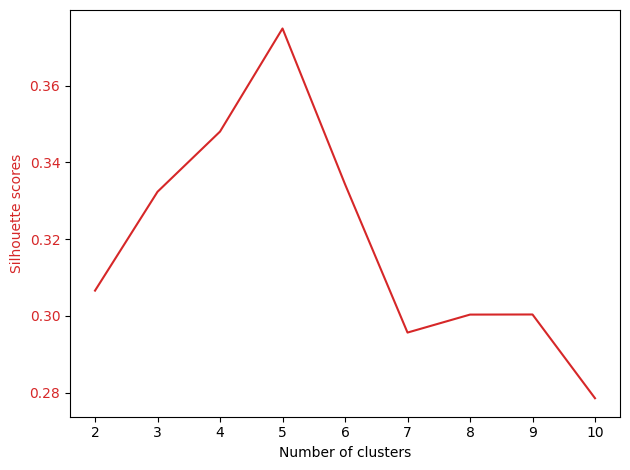

In [21]:
fig, ax = plt.subplots()

color = 'tab:red'

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores', color=color)
ax.plot(clusters_range, silhouette_scores, color=color)
ax.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

By dropping the column ‘GDP at market prices (constant 2005 US$)’, the silhouette score now tells us that the best clustering scheme would involve 5 clusters, instead of 2